## 1. Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [73]:
address_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\address_client.csv', encoding = "utf-8", on_bad_lines='skip', 
names=['id_client_rf', 'address', 'flag_provider', 'nflag_have_free_ports', 'tech_name', 'latitude', 'longitude'])

base_info_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\base_info_client.csv', encoding = "utf-8", 
names=['id_client_rf', 'name_rf', 'id_client', 'workersrange', 'total_revenue', 'companywithsameinfo', 'arbitrationcases',
'datefirstreg', 'flag_site', 'flag_business_center', 'flag_resident', 'date_actual_data', 'flag_vk'], parse_dates=['datefirstreg','date_actual_data'])

final_list = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\final_list.csv', encoding = "utf-8", names=['id_client_rf'])

okved_industry_client = pd.read_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\okved_industry_client.csv', encoding = "utf-8", 
names = ['id_client_rf', 'Code_okved', 'Name_okved', 'Type_okved', 'Industry'])

sales = pd.read_excel(r'C:\WORK\STUDY\GIT\Данные для хакатона\sales.xlsx',
names = ['month_sale', 'day_sale', 'id_client_rf', 'sale_size'])

In [3]:
pd.set_option('display.max_columns', 50)
print('Размерность address_client:', address_client.shape[0])
print(address_client.info())
print('Размерность base_info_client:', base_info_client.shape[0])
print(base_info_client.info())
print('Размерность final_list:', final_list.shape[0])
print(final_list.info())
print('Размерность okved_industry_client:', okved_industry_client.shape[0])
print(okved_industry_client.info())
print('Размерность sales:', sales.shape[0])
print(sales.info())

Размерность address_client: 1485674
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485674 entries, 0 to 1485673
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_client_rf           1485674 non-null  object 
 1   address                1485674 non-null  object 
 2   flag_provider          1485674 non-null  int64  
 3   nflag_have_free_ports  1485674 non-null  int64  
 4   tech_name              736940 non-null   object 
 5   latitude               1259978 non-null  float64
 6   longitude              1259978 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 79.3+ MB
None
Размерность base_info_client: 2218328
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218328 entries, 0 to 2218327
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_client_rf          int64         
 1   name_rf         

In [4]:
# Проверка кол-ва уникальных значений для столбцов, где должно быть булево значение
print('address_client:\n', address_client.nunique(), sep='')
print()
print('base_info_client:\n', base_info_client.nunique(), sep='')
print()
print('final_list:\n', final_list.nunique(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.nunique(), sep='')
print()
print('sales:\n', sales.nunique(), sep='')

address_client:
id_client_rf             587676
address                  183457
flag_provider                 2
nflag_have_free_ports         2
tech_name                    40
latitude                 114296
longitude                116575
dtype: int64

base_info_client:
id_client_rf            2218328
name_rf                      13
id_client               2218328
workersrange                 11
total_revenue              1559
companywithsameinfo         135
arbitrationcases            575
datefirstreg              12865
flag_site                     2
flag_business_center          2
flag_resident                 2
date_actual_data           4551
flag_vk                       2
dtype: int64

final_list:
id_client_rf    1950766
dtype: int64

okved_industry_client:
id_client_rf    2139266
Code_okved         2470
Name_okved         2396
Type_okved            2
Industry             33
dtype: int64

sales:
month_sale         7
day_sale         193
id_client_rf    9316
sale_size          3


In [32]:
# 1. address_client
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN


In [93]:
# Разделение столбца tech_name на отдельные столбцы под каждую технологию
# tech_dummies = tech_dummies.groupby(lambda x: x.split('_')[1], axis=1).max()
tech_dummies = pd.get_dummies(address_client['tech_name'].str.split(', ', expand=True), dummy_na=True)
tech_dummies.columns = tech_dummies.columns.map(lambda x: x.replace('\\', '').split('_')[-1])
tech_dummies = tech_dummies.groupby(lambda x: x, axis=1).max()
address_client = pd.concat([address_client, tech_dummies], axis=1)
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,False,False,False,True,False,False,False
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,False,False,False,True,False,False,False
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,False,False,False,True,False,False,False
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,False,False,False,True,False,False,False
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,False,False,False,True,False,False,False


In [42]:
# Проверяем корректность работы фунции по разделению столбца tech_name
df[df['tech_name']=='PON\, xDSL\, ETTH'].head()
# df.to_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\address_client_clear.csv')

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
7533,01803404_Ф05,"445019\, самарская обл\, тольятти г.\, горьког...",1,0,"PON\, xDSL\, ETTH",53.518754,49.405813,True,False,True,True,True,False,False
8526,01803685_Ф05,"445019\, самарская обл\, тольятти г.\, горьког...",1,0,"PON\, xDSL\, ETTH",53.518754,49.405813,True,False,True,True,True,False,False
27936,00247680_Ф05,"445019\, самарская обл\, тольятти г.\, горьког...",1,0,"PON\, xDSL\, ETTH",53.518754,49.405813,True,False,True,True,True,False,False
28565,00247845_Ф05,"445019\, самарская обл\, тольятти г.\, горьког...",1,0,"PON\, xDSL\, ETTH",53.518754,49.405813,True,False,True,True,True,False,False
65312,01788975_Ф03,"460019\, оренбургская обл\, оренбург г.\, шарл...",1,1,"PON\, xDSL\, ETTH",51.843896,55.117706,True,False,True,True,True,False,False


In [14]:
address_client['tech_name'].value_counts()

tech_name
xDSL                        463692
xDSL\, ETTH                  92202
ETTH\, xDSL                  91206
ETTH                         50836
PON                           9822
FTTx\, xDSL                   2874
PON\, xDSL                    2744
PON\, xDSL\, ETTH             2574
xDSL\, FTTx                   2280
xDSL\, PON                    2220
ETTH\, xDSL\, PON             1950
ETTH\, PON                    1812
FTTx\, xDSL\, ETTH            1792
xDSL\, PON\, ETTH             1500
xDSL\, ETTH\, PON             1498
ETTH\, FTTx\, xDSL            1292
ETTH\, PON\, xDSL             1214
PON\, ETTH                    1000
FTTx\, ETTH\, xDSL             808
ETTH\, xDSL\, FTTx             778
PON\, ETTH\, xDSL              742
xDSL\, ETTH\, FTTx             704
xDSL\, FTTx\, ETTH             562
FTTx                           518
БШПД                            84
ETTH\, PON\, xDSL\, FTTx        70
xDSL\, PON\, FTTx               66
PON\, FTTx\, xDSL\, ETTH        20
xDSL\, БШП

In [72]:
# Определение геополигонов
# !pip install geopy
import math

import pandas as pd
from geopy.distance import geodesic
from geopy.point import Point


class Point:
    latitude = 0
    longitude = 0

    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude


def check_points_distance_within_radius(point_a: Point, point_b: Point, radius):
 distance = geodesic(point_a, point_b).meters
 print(f'Distance: {distance}')
 if (distance <= radius):
  return True
 else:
  return False


def check_point_distance_and_points_list_within_radius(point_a: Point, dataframe: pd.DataFrame, radius):
    latitude_column_index = dataframe.columns.get_loc('latitude')
    longitude_column_index = dataframe.columns.get_loc('longitude')

    for index, row in dataframe.iterrows():
        if (math.isnan(row[latitude_column_index]) or math.isnan(row[longitude_column_index])):
            print('Coord is Nan')
            continue

        point_b = Point(row[latitude_column_index], row[longitude_column_index])
        if (check_points_distance_within_radius(point_a, point_b, radius)):
            return True

    return False

In [ ]:
base_info_client_with_coord = base_info_client.merge(address_client, how='left', on='id_client_rf')
final_list_with_coord = final_list.merge(address_client, how='left', on='id_client_rf')
final_list_with_distance_check = final_list_with_coord.assign(provider_in_50m = check_point_distance_and_points_list_within_radius(Point(final_list_with_coord['latitude'], final_list_with_coord['longitude']), base_info_client_with_coord, 50))

In [ ]:
address_client[address_client['latitude'].notnull()==True].head(5000)

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,has_nearby_company,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
1014,02176300_Ф13,"452800\, башкортостан респ\, янаульский р-н\, ...",0,0,xDSL,56.282250,54.941762,0,False,False,False,True,True,False,False
1019,02176300_Ф13,"453431\, башкортостан респ\, благовещенский р-...",1,0,xDSL,55.049895,55.964907,0,False,False,False,True,True,False,False
1023,02176300_Ф13,"453149\, башкортостан респ\, стерлитамакский р...",0,0,xDSL,53.807467,56.098343,0,False,False,False,True,True,False,False
1026,02176300_Ф13,"453550\, башкортостан респ\, белорецкий р-н\, ...",0,0,xDSL,53.838889,57.454413,0,False,False,False,True,True,False,False
1028,02176300_Ф13,"452685\, башкортостан респ\, нефтекамск г.\, л...",1,0,xDSL,56.094334,54.233593,0,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76319,01450693_Ф03,"460019\, оренбургская обл\, оренбург г.\, шарл...",1,1,"PON\, xDSL\, ETTH",51.843896,55.117706,0,True,False,True,True,True,False,False
76322,02139957_Ф10,"426028\, удмуртская респ\, ижевск г.\, гагарин...",1,0,"xDSL\, ETTH",56.814680,53.190272,0,True,False,False,True,True,False,False
76323,00857443_Ф03,"оренбургская обл\, оренбург г.\, салмышская ул...",1,1,xDSL,51.825653,55.162092,0,False,False,False,True,True,False,False
76324,01768365_Ф04,"пензенская обл\, пенза г.\, строителей пр-кт\,...",1,1,xDSL,53.221295,44.895058,0,False,False,False,True,True,False,False


In [69]:
# Функция определения ближайших компаний chat_gpt:
from tqdm.notebook import tqdm
from math import radians, sin, cos, sqrt, atan2
pbar = tqdm()
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c * 1000  # distance in meters

df = address_client[address_client['latitude'].notnull()==True].head(5000)
df['has_nearby_company'] = 0

pbar.reset(total=len(df))
for i, row in df.iterrows():
    lat1, lon1 = row['latitude'], row['longitude']
    for j, other_row in df.iterrows():
        if i != j:
            lat2, lon2 = other_row['latitude'], other_row['longitude']
            dist = haversine(lat1, lon1, lat2, lon2)
            if dist <= 50:
                df.at[i, 'has_nearby_company'] = 1
                break
    pbar.update()             
pbar.refresh()

df.head()            
            

0it [00:00, ?it/s]

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,has_nearby_company,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
1014,02176300_Ф13,"452800\, башкортостан респ\, янаульский р-н\, ...",0,0,xDSL,56.282250,54.941762,1,False,False,False,True,True,False,False
1019,02176300_Ф13,"453431\, башкортостан респ\, благовещенский р-...",1,0,xDSL,55.049895,55.964907,1,False,False,False,True,True,False,False
1023,02176300_Ф13,"453149\, башкортостан респ\, стерлитамакский р...",0,0,xDSL,53.807467,56.098343,1,False,False,False,True,True,False,False
1026,02176300_Ф13,"453550\, башкортостан респ\, белорецкий р-н\, ...",0,0,xDSL,53.838889,57.454413,1,False,False,False,True,True,False,False
1028,02176300_Ф13,"452685\, башкортостан респ\, нефтекамск г.\, л...",1,0,xDSL,56.094334,54.233593,1,False,False,False,True,True,False,False


In [71]:
df[df['has_nearby_company']==0]

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,has_nearby_company,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
1173,02176675_Ф13,"453166\, башкортостан респ\, стерлитамакский р...",0,0,xDSL,53.728610,55.515822,0,False,False,False,True,True,False,False
1177,02176675_Ф13,"452455\, башкортостан респ\, бирский р-н\, бир...",0,0,xDSL,55.433430,55.552698,0,False,False,False,True,True,False,False
1180,02176675_Ф13,"452120\, башкортостан респ\, альшеевский р-н\,...",0,0,xDSL,54.071569,54.943882,0,False,False,False,True,True,False,False
1183,02176675_Ф13,"452810\, башкортостан респ\, янаульский р-н\, ...",0,0,xDSL,56.232834,54.542066,0,False,False,False,True,True,False,False
1188,02176675_Ф13,"453142\, башкортостан респ\, стерлитамакский р...",0,0,xDSL,53.418332,55.739888,0,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,01967885_Ф08,"425231\, марий эл респ\, медведевский р-н\, ру...",0,1,NaN,56.627213,47.751573,0,False,False,False,True,False,False,False
7169,00425539_Ф04,"442780\, пензенская обл\, бессоновский р-н\, б...",1,0,xDSL,53.310710,45.043199,0,False,False,False,True,True,False,False
8404,00923586_Ф07,"433310\, ульяновская обл\, ульяновский р-н\, и...",1,0,NaN,54.425928,48.279964,0,False,False,False,True,False,False,False
9960,00596613_Ф01,"612600\, кировская обл\, котельничский р-н\, к...",0,1,NaN,58.299085,48.332641,0,False,False,False,True,False,False,False


In [46]:
# 2. base_info_client
base_info_client.head()

,id_client_rf,name_rf,id_client,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354_Ф09,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0
1,1631368_Ф09,Ф09,01631368_Ф09,NaN,0,1.0,NaN,2020-07-31,0,0,0,NaT,0
2,1631377_Ф09,Ф09,01631377_Ф09,NaN,0,1.0,NaN,2020-08-17,0,0,0,NaT,0
3,1631387_Ф09,Ф09,01631387_Ф09,NaN,0,1.0,NaN,2019-12-23,0,0,0,NaT,0
4,1631409_Ф09,Ф09,01631409_Ф09,NaN,0,1.0,NaN,2020-10-19,0,0,0,NaT,0


In [77]:
# Смотрим в каком формате хранятся записи workersrange. Нужно будет оставить только правую часть.
# base_info_client[base_info_client['workersrange'].notnull()==True]
# Переводим workersrange в числовой формат по правой цифре. 
base_info_client['workersrange'] = base_info_client['workersrange'].str.replace('(.* \.\. )|(.*\.\.)','', regex=True).dropna().astype(int)
# Переводим id_client_rf в такой же формат, как и в других таблицах
# base_info_client['id_client_rf'] = base_info_client['id_client_rf'].astype(str)+'_'+base_info_client['name_rf'].astype(str)
# Меняем заголовки местами, поскольку в датафрейме они перепутаны
base_info_client.rename(columns={'id_client_rf': 'id_client', 'id_client': 'id_client_rf'}, inplace=True)
base_info_client.head(1)

,id_client,name_rf,id_client_rf,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0


In [8]:
# 3. final_list
final_list.head()

,id_client_rf
0,01768987_Ф04
1,01769012_Ф04
2,01769016_Ф04
3,01769018_Ф04
4,01769044_Ф04


In [9]:
# 4. okved_industry_client
okved_industry_client.head()

,id_client_rf,Code_okved,Name_okved,Type_okved,Industry
0,00811390_Ф13,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
1,01516426_Ф10,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
2,01258497_Ф06,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
3,01583065_Ф12,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
4,01506195_Ф04,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес


In [47]:
# 5. sales
sales.head()
# sales['sale_size'].unique()

,month_sale,day_sale,id_client_rf,sale_size
0,2023-03-01,2023-03-16,00309682_Ф12,3
1,2023-03-01,2023-03-16,00309999_Ф12,3
2,2023-03-01,2023-03-07,00333129_Ф12,3
3,2023-03-01,2023-03-24,00333306_Ф12,3
4,2023-03-01,2023-03-07,00333741_Ф12,3


In [98]:
# Переводим sale_size в цифровой формат
sales['sale_size'] = np.where(sales['sale_size']=='High     ', 3,
 np.where(sales['sale_size']=='Middle   ', 2,
 np.where(sales['sale_size']=='Low      ', 1, 0)))

In [82]:
# Рассчитываем столбец кол-ва дней с даты регистрации компании до покупки
df_delta_date = sales.merge(base_info_client, how='left', on='id_client_rf' )
df_delta_date['delta_date'] = (df_delta_date['day_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9  
print(sales.info())
print(df_delta_date.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10428 entries, 0 to 10427
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month_sale    10428 non-null  datetime64[ns]
 1   day_sale      10428 non-null  datetime64[ns]
 2   id_client_rf  10428 non-null  object        
 3   sale_size     10428 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 326.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10428 entries, 0 to 10427
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   month_sale            10428 non-null  datetime64[ns]
 1   day_sale              10428 non-null  datetime64[ns]
 2   id_client_rf          10428 non-null  object        
 3   sale_size             10428 non-null  object        
 4   id_client             10428 non-null  int64         
 5   name_r

In [60]:
df_delta_date['delta_date'] = (df_delta_date['day_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9 
df_delta_date.head()

,month_sale,day_sale,id_client_rf,sale_size,id_client,name_rf,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk,delta_date
0,2023-03-01,2023-03-16,00309682_Ф12,3,309682,Ф12,NaN,2,2.0,NaN,2015-07-22,0,0,1,2017-03-01,0,241401600.0
1,2023-03-01,2023-03-16,00309999_Ф12,3,309999,Ф12,NaN,2,2.0,NaN,2015-07-22,0,0,1,2017-03-01,0,241401600.0
2,2023-03-01,2023-03-07,00333129_Ф12,3,333129,Ф12,NaN,2,1.0,NaN,2020-12-22,0,0,0,NaT,0,69552000.0
3,2023-03-01,2023-03-24,00333306_Ф12,3,333306,Ф12,NaN,1,2.0,NaN,2019-05-31,1,1,0,2022-08-04,0,120355200.0
4,2023-03-01,2023-03-07,00333741_Ф12,3,333741,Ф12,NaN,2,1.0,NaN,2020-12-22,0,0,0,NaT,0,69552000.0


In [12]:
# Анализ пропусков
print('address_client:\n', address_client.isna().sum(), sep='')
print()
print('base_info_client:\n', base_info_client.isna().sum(), sep='')
print()
print('final_list:\n', final_list.isna().sum(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.isna().sum(), sep='')
print()
print('sales:\n', sales.isna().sum(), sep='')


address_client:
id_client_rf                  0
address                       0
flag_provider                 0
nflag_have_free_ports         0
tech_name                748734
latitude                 225696
longitude                225696
dtype: int64

base_info_client:
id_client_rf                  0
name_rf                       0
id_client                     0
workersrange            2216478
total_revenue                 0
companywithsameinfo     1321582
arbitrationcases        1781086
datefirstreg              10800
flag_site                     0
flag_business_center          0
flag_resident                 0
date_actual_data        1751900
flag_vk                       0
dtype: int64

final_list:
id_client_rf    0
dtype: int64

okved_industry_client:
id_client_rf      0
Code_okved        0
Name_okved        0
Type_okved        0
Industry        236
dtype: int64

sales:
month_sale      0
day_sale        0
id_client_rf    0
sale_size       0
dtype: int64


In [13]:
# Анализ дубликатов
print('address_client:\n', address_client.duplicated().sum())
print()
print('base_info_client:\n', base_info_client.duplicated().sum())
print()
print('final_list:\n', final_list.duplicated().sum())
print()
print('okved_industry_client:\n', okved_industry_client.duplicated().sum())
print()
print('sales:\n', sales.duplicated().sum())

address_client:
 0

base_info_client:
 0

final_list:
 0

okved_industry_client:
 0

sales:
 0


In [92]:
# Создаем единый датасет (не уверен, что правильно смержил)
# .merge(base_info_client, how='left', on='id_client_rf' ).merge(address_client, how='left', on='id_client_rf' )
df_union = sales.merge(okved_industry_client, how='left', on='id_client_rf' ).merge(base_info_client, how='left', on='id_client_rf' ).merge(address_client, how='left', on='id_client_rf' )

In [93]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581374 entries, 0 to 5581373
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   month_sale    datetime64[ns]
 1   day_sale      datetime64[ns]
 2   id_client_rf  object        
 3   sale_size     float64       
 4   Code_okved    object        
 5   Name_okved    object        
 6   Type_okved    int64         
 7   Industry      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 340.7+ MB


In [80]:
df_union

,id_client_rf,name_rf,id_client,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk,Code_okved,Name_okved,Type_okved,Industry
0,1631354_Ф09,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0,NaN,NaN,NaN,NaN
1,1631368_Ф09,Ф09,01631368_Ф09,NaN,0,1.0,NaN,2020-07-31,0,0,0,NaT,0,NaN,NaN,NaN,NaN
2,1631377_Ф09,Ф09,01631377_Ф09,NaN,0,1.0,NaN,2020-08-17,0,0,0,NaT,0,NaN,NaN,NaN,NaN
3,1631387_Ф09,Ф09,01631387_Ф09,NaN,0,1.0,NaN,2019-12-23,0,0,0,NaT,0,NaN,NaN,NaN,NaN
4,1631409_Ф09,Ф09,01631409_Ф09,NaN,0,1.0,NaN,2020-10-19,0,0,0,NaT,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218323,1067702_Ф05,Ф05,01067702_Ф05,NaN,0,NaN,NaN,2022-06-14,0,0,0,NaT,0,NaN,NaN,NaN,NaN
2218324,1053763_Ф05,Ф05,01053763_Ф05,NaN,0,NaN,NaN,2022-04-04,0,0,0,NaT,0,NaN,NaN,NaN,NaN
2218325,1053883_Ф05,Ф05,01053883_Ф05,NaN,0,NaN,NaN,2022-04-04,0,0,0,NaT,0,NaN,NaN,NaN,NaN
2218326,1054804_Ф05,Ф05,01054804_Ф05,NaN,0,NaN,NaN,2022-06-14,0,0,0,NaT,0,NaN,NaN,NaN,NaN


In [ ]:
df = final_list.merge(okved_industry_client, how='left', on='id_client_rf' )

In [78]:
base_info_client

,id_client,name_rf,id_client_rf,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0
1,1631368,Ф09,01631368_Ф09,NaN,0,1.0,NaN,2020-07-31,0,0,0,NaT,0
2,1631377,Ф09,01631377_Ф09,NaN,0,1.0,NaN,2020-08-17,0,0,0,NaT,0
3,1631387,Ф09,01631387_Ф09,NaN,0,1.0,NaN,2019-12-23,0,0,0,NaT,0
4,1631409,Ф09,01631409_Ф09,NaN,0,1.0,NaN,2020-10-19,0,0,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218323,1067702,Ф05,01067702_Ф05,NaN,0,NaN,NaN,2022-06-14,0,0,0,NaT,0
2218324,1053763,Ф05,01053763_Ф05,NaN,0,NaN,NaN,2022-04-04,0,0,0,NaT,0
2218325,1053883,Ф05,01053883_Ф05,NaN,0,NaN,NaN,2022-04-04,0,0,0,NaT,0
2218326,1054804,Ф05,01054804_Ф05,NaN,0,NaN,NaN,2022-06-14,0,0,0,NaT,0


In [84]:
# sales.merge(base_info_client, how='left', on='id_client_rf' )
# final_data_sales = sales.merge(okved_industry_client, how='left', on='id_client_rf')\
#                   .merge(base_info_client, how='left', on='id_client_rf')\
#                   .merge(address_client, how='left', on='id_client_rf')\
#                   .merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')
final_data_sales = sales.merge(okved_industry_client, how='left', on='id_client_rf')
final_data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28948 entries, 0 to 28947
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month_sale    28948 non-null  datetime64[ns]
 1   day_sale      28948 non-null  datetime64[ns]
 2   id_client_rf  28948 non-null  object        
 3   sale_size     28948 non-null  object        
 4   Code_okved    28924 non-null  object        
 5   Name_okved    28924 non-null  object        
 6   Type_okved    28924 non-null  float64       
 7   Industry      28922 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 1.8+ MB


In [94]:
# final_data_sales['id_client_rf'].value_counts()
# final_data_sales[final_data_sales['id_client_rf']=='01016923_Ф02']
address_client[address_client['id_client_rf']=='01016923_Ф02']
# okved_industry_client[okved_industry_client['id_client_rf']=='01016923_Ф02']

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика


In [101]:
sales_clients = sales.groupby('id_client_rf').agg(month_sale=('month_sale', 'min'), sale_size=('sale_size', 'max'), sale_count=('sale_size', 'count')).sort_values('sale_count', ascending = False)
sales_clients

,month_sale,sale_size,sale_count
id_client_rf,,,
01017082_Ф02,2023-01-01,3,11
01016923_Ф02,2023-01-01,3,11
00287063_Ф06,2023-01-01,3,8
00287187_Ф06,2023-01-01,3,8
00896607_Ф02,2023-01-01,3,7
...,...,...,...
00880130_Ф03,2023-03-01,3,1
00879953_Ф03,2023-03-01,3,1
00879478_Ф03,2023-07-01,3,1


In [102]:
sales.groupby('month_sale').agg('count')

,day_sale,id_client_rf,sale_size
month_sale,,,
2023-01-01,1172,1172,1172
2023-02-01,1566,1566,1566
2023-03-01,1842,1842,1842
2023-04-01,1578,1578,1578
2023-05-01,1454,1454,1454
2023-06-01,1468,1468,1468
2023-07-01,1348,1348,1348


### Причины дублей по клиентам:
'id_client_rf'=='01016923_Ф02'

В таблице **okved_industry_client** по данному клиенту 3 записи:

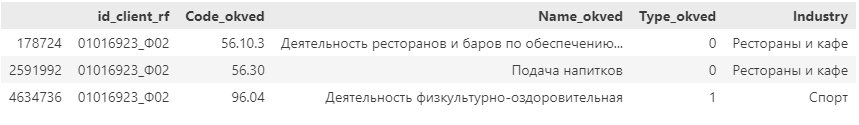

В таблице **sales** было несколько продаж:

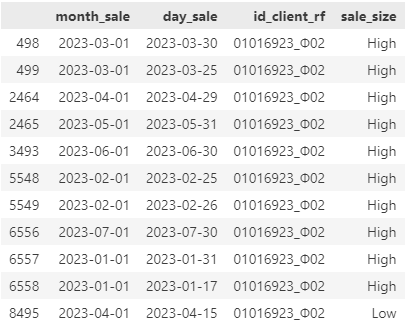

В **base_info_client** одна запись:

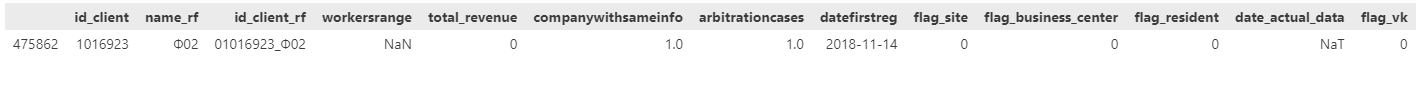

В **address_client** нет записей:

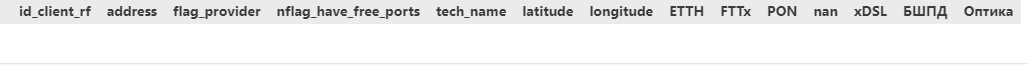